## Spooky EDA

[Spooky Author Competition](https://www.kaggle.com/c/spooky-author-identification)

[Inspiration](https://www.kaggle.com/headsortails/treemap-house-of-horror-spooky-eda-lda-features)


You may need to install wordclould - run 

``` bash 
pip install wordcloud ```

in your terminal 

You could also run 
``` bash 
!pip install wordcloud```

in a jupyter cell but this is not reccomnded - bash commands are meant for the terminal, not the notebook. 

---

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 99)

%matplotlib inline

In [2]:
df = pd.read_csv('../data/spooky_author.csv')

In [3]:
df.head(4)

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I ...",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all man...",EAP
3,id27763,How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread b...,MWS


In [4]:
X = df['text']
y = df['author']

df['text'][3]

'How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.'

### Let's create a wordcloud from Edgar Allen Poe text 

The wordcloud library is looking for raw text as the input

In [5]:
wc = wordcloud.WordCloud()
text = df.loc[df['author'] == 'EAP', 'text'].str.cat()
wc.generate_from_text(text);

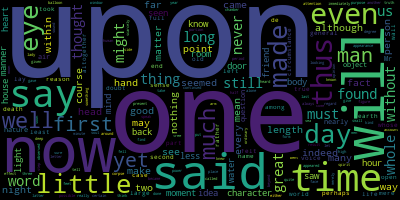

In [6]:
wc.to_image()

### Create word clouds from the other two authors 

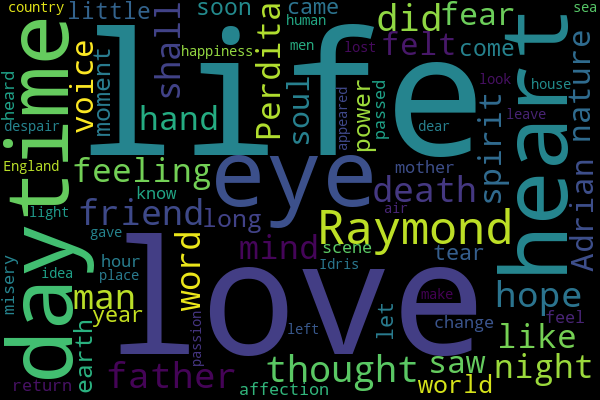

In [7]:
### code 
### code 
def word_clouder(author, custom_stops = []):
    stops = list(ENGLISH_STOP_WORDS) + custom_stops
    wc = wordcloud.WordCloud(width=600, height=400, max_words=75\
                        , stopwords=stops)
    text = df.loc[df['author'] == author, 'text'].str.cat()
    wc.generate_from_text(text)
    return wc.to_image()
word_clouder('MWS', ['said']) ### adding said as a stopword

### Use count vectorizer to quantify the text and store it in a Pandas Data Frame

In [8]:
custom_stop = list(ENGLISH_STOP_WORDS)

cv = CountVectorizer(stop_words=custom_stop, min_df=6)
vect_df = pd.DataFrame(cv.fit_transform(df['text']).todense(),
                      columns = cv.get_feature_names())

### Make sub dataframes  for each author 

Make sure to use `.copy()` to create a new dataframe in memory

In [9]:
eap_df = vect_df[df['author'] =='EAP']
mws_df = vect_df[df['author'] == 'MWS']
hpl_df = vect_df[df['author'] == 'HPL']

In [10]:
type(vect_df)

pandas.core.frame.DataFrame

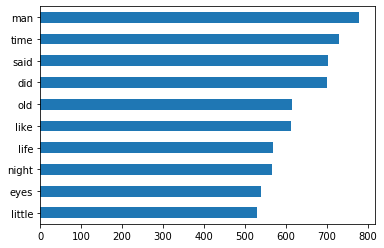

In [11]:
vect_df.sum().sort_values().tail(10).plot.barh();

### What are the most frequent words?

In [12]:
top_words = list(vect_df.sum().sort_values().tail(15).index)

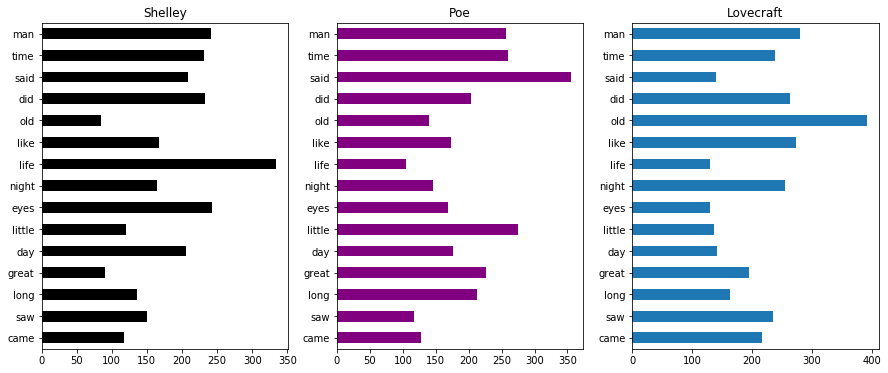

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6));

mws_df.loc[:, top_words].sum().plot.barh(ax=ax1, color='black')
eap_df.loc[:, top_words].sum().plot.barh(ax=ax2, color='purple')
hpl_df.loc[:, top_words].sum().plot.barh(ax=ax3)

ax1.set_title('Shelley')
ax2.set_title('Poe')
ax3.set_title('Lovecraft');

### Top 20 most frequent words broken down by author  

###  Words per sentence by author 

In [14]:
df.loc[df['author'] == 'EAP', 'text'].map(lambda x: len(x.split()))
# quick lambda 1-liner to do below code. counts words per sentence.

0        41
2        36
6        21
7         8
8        88
         ..
19572    51
19574    20
19575    10
19576    13
19577    15
Name: text, Length: 7900, dtype: int64

In [15]:
poe_text = df.loc[df['author'] == 'EAP', 'text']
[len(i.split()) for i in poe_text]

[41,
 36,
 21,
 8,
 88,
 10,
 10,
 61,
 48,
 21,
 18,
 82,
 11,
 25,
 93,
 31,
 10,
 47,
 27,
 18,
 47,
 15,
 16,
 22,
 15,
 40,
 28,
 39,
 37,
 42,
 16,
 9,
 8,
 7,
 16,
 23,
 12,
 24,
 36,
 9,
 52,
 13,
 11,
 25,
 13,
 11,
 9,
 11,
 93,
 74,
 29,
 12,
 26,
 5,
 93,
 61,
 18,
 13,
 19,
 25,
 16,
 44,
 64,
 9,
 39,
 24,
 31,
 45,
 25,
 38,
 11,
 54,
 9,
 18,
 7,
 21,
 12,
 37,
 83,
 37,
 32,
 20,
 19,
 4,
 34,
 9,
 7,
 11,
 26,
 23,
 29,
 10,
 26,
 28,
 16,
 8,
 21,
 28,
 7,
 40,
 4,
 32,
 13,
 8,
 14,
 19,
 10,
 48,
 10,
 13,
 6,
 82,
 83,
 4,
 4,
 9,
 12,
 8,
 37,
 7,
 52,
 9,
 36,
 72,
 7,
 47,
 21,
 28,
 11,
 10,
 17,
 11,
 13,
 9,
 13,
 24,
 19,
 8,
 5,
 12,
 45,
 41,
 45,
 13,
 45,
 17,
 42,
 55,
 11,
 7,
 16,
 21,
 15,
 30,
 4,
 24,
 17,
 14,
 15,
 21,
 9,
 5,
 32,
 30,
 34,
 5,
 58,
 23,
 5,
 82,
 12,
 12,
 9,
 58,
 15,
 33,
 5,
 19,
 6,
 22,
 11,
 18,
 57,
 15,
 30,
 6,
 30,
 7,
 35,
 39,
 27,
 17,
 41,
 18,
 41,
 31,
 5,
 22,
 9,
 18,
 15,
 38,
 13,
 4,
 12,
 16,
 25,
 22,
 1

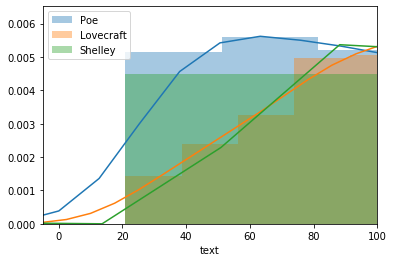

In [16]:
def get_char_len(author): # this is for chracters
    return df.loc[df['author'] == author, 'text'].map(lambda x: len(x))
epchar = get_char_len('EAP')
mwchar = get_char_len('MWS')
hpchar = get_char_len('HPL')
fig , ax = plt.subplots()
sns.distplot(epchar, label = 'Poe')
sns.distplot(hpchar, label = 'Lovecraft')
sns.distplot(mwchar, label = 'Shelley')
ax.set_xbound(-5,100)
ax.legend();

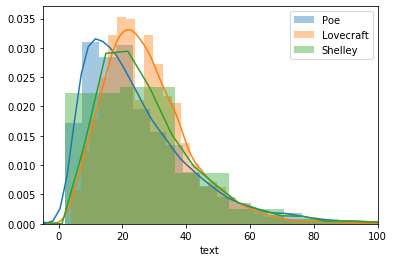

In [17]:
def get_len(author): # this is for words per sentence.
    return df.loc[df['author'] == author, 'text'].map(lambda x: len(x.split()))
eplen = get_len('EAP')
mwlen = get_len('MWS')
hplen = get_len('HPL')
fig , ax = plt.subplots()
sns.distplot(eplen, label = 'Poe')
sns.distplot(hplen, label = 'Lovecraft')
sns.distplot(mwlen, label = 'Shelley')
ax.set_xbound(-5,100)
ax.legend();